In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [3]:
df_poke = pd.read_csv('pokemon.csv', index_col=0)
df_poke.sample(2)

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
214,Murkrow,Dark,Flying,60,85,42,85,42,91,False
125,Mega Kangaskhan,Normal,NaN,105,125,100,60,100,100,False


In [4]:
df_combats = pd.read_csv('combats.csv')
df_combats.sample(2)

,First_pokemon,Second_pokemon,Winner
45750,41,70,70
13458,496,210,496


### Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

(6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

(4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
visualize the relation between these two variables using an appropriate plot;
list the names of the 3 Pokémon with highest attack-over-defense ratio;
list the names of the 3 Pokémon with lowest attack-over-defense ratio;
list the names of the 10 Pokémon with the largest number of victories.

(10 points) Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

(10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories. Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called pokemon and combats, with the same schema as the small CSV files you’ve been working with above.

--- 


(6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [663]:
df_poke.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [664]:
# get unique from multiple columns - we need to flatten to one dimension using ravel

unique_values = pd.unique(df_poke[['Class 1','Class 2']].values.ravel('K'))
len(unique_values)

19

/Users/josefweber/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


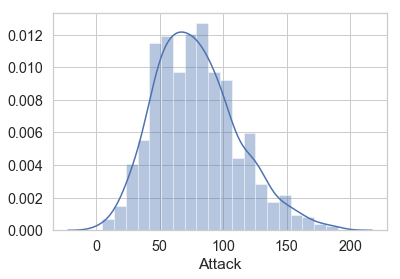

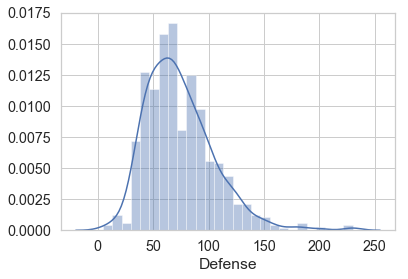

In [694]:
# attack and defense distribution

sns.distplot(df_poke['Attack'])
plt.show()
sns.distplot(df_poke['Defense'])
plt.show()

(4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature.

In particular,
- visualize the relation between these two variables using an appropriate plot;
- list the names of the 3 Pokémon with highest attack-over-defense ratio;
- list the names of the 3 Pokémon with lowest attack-over-defense ratio;
- list the names of the 10 Pokémon with the largest number of victories.

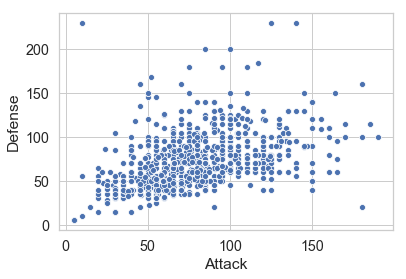

In [666]:
def apply_func(row):
    return row['Attack'] / row['Defense']

df_poke['Ratio'] = df_poke.apply(lambda row: apply_func(row), axis=1)

sns.scatterplot(x=df_poke.Attack, y=df_poke.Defense)

In [668]:

highest_ratio = df_poke.sort_values(['Ratio'], ascending=False).head(3)
lowest_ratio = df_poke.sort_values(['Ratio'], ascending=False).tail(3)

print("highest ratio: \n\n", highest_ratio['Name'])
print("lowest ratio: \n\n", lowest_ratio['Name'])

highest ratio: 

 429    DeoxysAttack Forme
347              Carvanha
19          Mega Beedrill
Name: Name, dtype: object
lowest ratio: 

 484     Bronzor
139    Magikarp
230     Shuckle
Name: Name, dtype: object


In [669]:
most_wins = df_combats["Winner"].value_counts(sort=True).iloc[0:10]
df_poke.iloc[most_wins.index]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Ratio
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,1.900000
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235
438,439,Piplup,Water,NaN,53,51,53,61,56,40,False,0.962264
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True,3.000000
432,433,Turtwig,Grass,NaN,55,68,64,45,55,31,False,1.062500
314,315,Nincada,Bug,Ground,31,45,90,30,30,40,False,0.500000
214,215,Slowking,Water,Psychic,95,75,80,100,110,30,False,0.937500
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,False,0.479167
249,250,Kingdra,Water,Dragon,75,95,95,95,95,85,False,1.000000
155,156,Snorlax,Normal,NaN,160,110,65,65,110,30,False,1.692308


(10 points) Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

/Users/josefweber/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


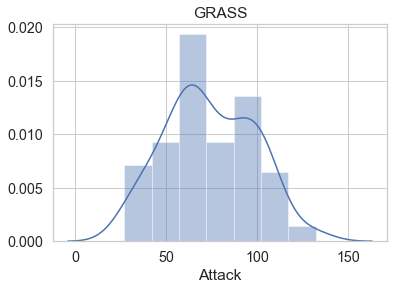

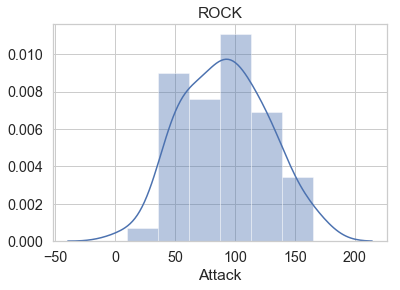

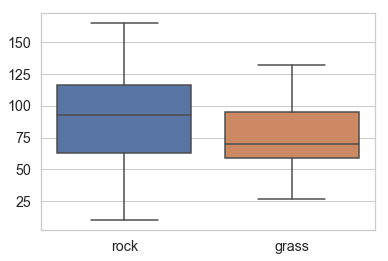

In [693]:
# filter pokemon that are rock and grass
filtered_pokemon = df_poke[~((df_poke['Class 1'] == 'Rock') & (df_poke['Class 2'] == 'Grass'))]

grass = filtered_pokemon[(filtered_pokemon['Class 1'] == 'Grass') | (filtered_pokemon['Class 2'] == 'Grass')]
rock = filtered_pokemon[(filtered_pokemon['Class 1'] == 'Rock') | (filtered_pokemon['Class 2'] == 'Rock')]

plt.title("GRASS")
sns.distplot(grass['Attack'])
plt.show()

plt.title("ROCK")
sns.distplot(rock['Attack'])
plt.show()


df_grass_rock = pd.DataFrame({"rock": rock['Attack'], "grass":grass['Attack']})
sns.boxplot(data=df_grass_rock)


(10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories. Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called pokemon and combats, with the same schema as the small CSV files you’ve been working with above.

“list the names of the 10 Pokémon with the largest number of victories”

In [11]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import findspark
findspark.init()
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.functions import min
from pyspark.sql.functions import avg
from pyspark.sql import functions as F

from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [12]:
df_spark = spark.createDataFrame(df_combats)

most_winners_spark = df_spark.groupby('Winner') \
                    .count() \
                    .orderBy("count", ascending=False) 

most_winners_spark.take(10)

[Row(Winner=163, count=152),
 Row(Winner=438, count=136),
 Row(Winner=154, count=136),
 Row(Winner=428, count=134),
 Row(Winner=432, count=133),
 Row(Winner=314, count=133),
 Row(Winner=214, count=130),
 Row(Winner=394, count=130),
 Row(Winner=249, count=128),
 Row(Winner=427, count=127)]

### Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

(3 points) Generate the feature vectors and the labels to train your model.

(5 points) How does your model handle categorical features and Pokémon with multiple classes?

(10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (n_estimators, try values 10, 25, 50, 100) and the maximum tree depth (max_depth, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

(5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

(5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

(7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

(5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

--------
--------

(3 points) Generate the feature vectors and the labels to train your model.


In [125]:
# 

df_combats = pd.read_csv('combats.csv')
df_poke = pd.read_csv('pokemon.csv')

df_combats["win"] = df_combats.apply(lambda x: 0 if x.Winner == x.Second_pokemon else 1, axis=1)

df_combats.sample(2)

,First_pokemon,Second_pokemon,Winner,win
22386,92,799,799,0
38759,314,151,314,1


In [14]:
df_poke.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# V1 - differences

In [775]:
features = ['pid', 'Class 1', 'Class 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

features_dummies = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Class 1_Bug',
       'Class 1_Dark', 'Class 1_Dragon', 'Class 1_Electric', 'Class 1_Fairy',
       'Class 1_Fighting', 'Class 1_Fire', 'Class 1_Flying', 'Class 1_Ghost',
       'Class 1_Grass', 'Class 1_Ground', 'Class 1_Ice', 'Class 1_Normal',
       'Class 1_Poison', 'Class 1_Psychic', 'Class 1_Rock', 'Class 1_Steel',
       'Class 1_Water', 'Class 2_Bug', 'Class 2_Dark', 'Class 2_Dragon',
       'Class 2_Electric', 'Class 2_Fairy', 'Class 2_Fighting', 'Class 2_Fire',
       'Class 2_Flying', 'Class 2_Ghost', 'Class 2_Grass', 'Class 2_Ground',
       'Class 2_Ice', 'Class 2_Normal', 'Class 2_Poison', 'Class 2_Psychic',
       'Class 2_Rock', 'Class 2_Steel', 'Class 2_Water']

In [776]:
dummie_data = df_poke[features]
dummie_data = pd.get_dummies(dummie_data)

In [777]:
first_poke = pd.merge(df_combats, dummie_data, left_on="First_pokemon", right_on="pid", how="left")
second_poke = pd.merge(df_combats, dummie_data, left_on="Second_pokemon", right_on="pid", how="left")

difference = first_poke[features_dummies] - second_poke[features_dummies]

X = difference
y = df_combats['win']

# V2 - no differences

In [696]:

pokemon_features_original = ['Class 1', 'Class 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']
features_1 = ['1_Class 1', '1_Class 2', '1_HP', '1_Attack', '1_Defense', '1_Sp. Atk', '1_Sp. Def', '1_Speed', '1_Legendary']
features_2 = ['2_Class 1', '2_Class 2', '2_HP', '2_Attack', '2_Defense', '2_Sp. Atk', '2_Sp. Def', '2_Speed', '2_Legendary']
drop_cols = ['pid', 'Name']

data = df_combats.merge(df_poke, left_on="First_pokemon", right_on="pid")
data = data.drop(drop_cols, axis=1)
data = data.rename(index=str,columns=dict(zip(pokemon_features_original, features_1)))

data = data.merge(df_poke, left_on="Second_pokemon", right_on="pid")
data = data.drop(drop_cols, axis=1)
data = data.drop("Winner", axis=1)
data = data.rename(index=str,columns=dict(zip(pokemon_features_original, features_2)))

data.head()

,First_pokemon,Second_pokemon,win,Loser,1_Class 1,1_Class 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,...,2_Class 1,2_Class 2,2_HP,2_Attack,2_Defense,2_Sp. Atk,2_Sp. Def,2_Speed,2_Legendary,Ratio_y
0,266,298,0,266,Rock,Ground,50,64,50,45,...,Grass,Dark,70,70,40,60,40,60,False,1.75
1,73,298,0,73,Fighting,NaN,70,80,50,35,...,Grass,Dark,70,70,40,60,40,60,False,1.75
2,373,298,0,373,Water,Ground,110,78,73,76,...,Grass,Dark,70,70,40,60,40,60,False,1.75
3,536,298,1,298,Electric,Flying,50,65,107,105,...,Grass,Dark,70,70,40,60,40,60,False,1.75
4,368,298,1,298,Normal,NaN,73,115,60,60,...,Grass,Dark,70,70,40,60,40,60,False,1.75


In [720]:
pokemon_features = features_1+features_2
pokemon_class = 'win'

X = data[pokemon_features]
y = data[pokemon_class]
print(X.shape, y.shape)

(50000, 18) (50000,)


(5 points) How does your model handle categorical features and Pokémon with multiple classes?

In [721]:
# we make categorical data to numerical
X = pd.get_dummies(X)

In [722]:
print("size of feature matrix", X.shape, " having features: ", X.shape[1])

size of feature matrix (50000, 86)  having features:  86


---

(10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (n_estimators, try values 10, 25, 50, 100) and the maximum tree depth (max_depth, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

---


In [778]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45000, 42) (5000, 42) (45000,) (5000,)


In [779]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [780]:
# single rf run

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

df_preds = pd.DataFrame({'y_test':y_test, 'predictions':predictions})
f1_score_res = f1_score(df_preds['y_test'], df_preds['predictions'])

print("n-estimators: ", n, "\t max-depth:", d, "\t f1_score:", f1_score_res)

n-estimators:  100 	 max-depth: 0.0 	 f1_score: 0.9410521867737164


In [781]:
n_estimators = [10, 25, 50, 100]
max_depth = [2, 4, 10]

for n in n_estimators:
    for d in max_depth:
        
        clf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        df_preds = pd.DataFrame({'y_test':y_test, 'predictions':predictions})
        f1_score_res = f1_score(df_preds['y_test'], df_preds['predictions'])

        print("n-estimators: ", n, "\t max-depth:", d, "\t f1_score:", f1_score_res)

n-estimators:  10 	 max-depth: 2 	 f1_score: 0.6094588005850805
n-estimators:  10 	 max-depth: 4 	 f1_score: 0.872900590104403
n-estimators:  10 	 max-depth: 10 	 f1_score: 0.9395546129374338
n-estimators:  25 	 max-depth: 2 	 f1_score: 0.7623619779164666
n-estimators:  25 	 max-depth: 4 	 f1_score: 0.9202162162162162
n-estimators:  25 	 max-depth: 10 	 f1_score: 0.940084388185654
n-estimators:  50 	 max-depth: 2 	 f1_score: 0.8777272727272728
n-estimators:  50 	 max-depth: 4 	 f1_score: 0.9374605180037904
n-estimators:  50 	 max-depth: 10 	 f1_score: 0.9398353388220393
n-estimators:  100 	 max-depth: 2 	 f1_score: 0.895148669796557
n-estimators:  100 	 max-depth: 4 	 f1_score: 0.9374868448747631
n-estimators:  100 	 max-depth: 10 	 f1_score: 0.9410521867737164


----

(5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

----

In [ ]:
# best params = 
# n-estimators:  100 	 max-depth: 10 	 f1_score: 0.8959598074105086

(5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).



(7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

---


(5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

---

In [75]:
# get importance values for each feature
feature_importances = clf.feature_importances_

# feature names from X feature matrix
feature_name = X.columns

# build df of names and importance
df_feature_importance = pd.DataFrame({"feature_name":feature_name,"feature_importances":feature_importances})

# sort df by importance
df_feature_importance = df_feature_importance.sort_values(by="feature_importances", ascending=False)

# take only highest 10
df_feature_importance = df_feature_importance.head(10)

Text(0.5,1,'Top 10 Tags')

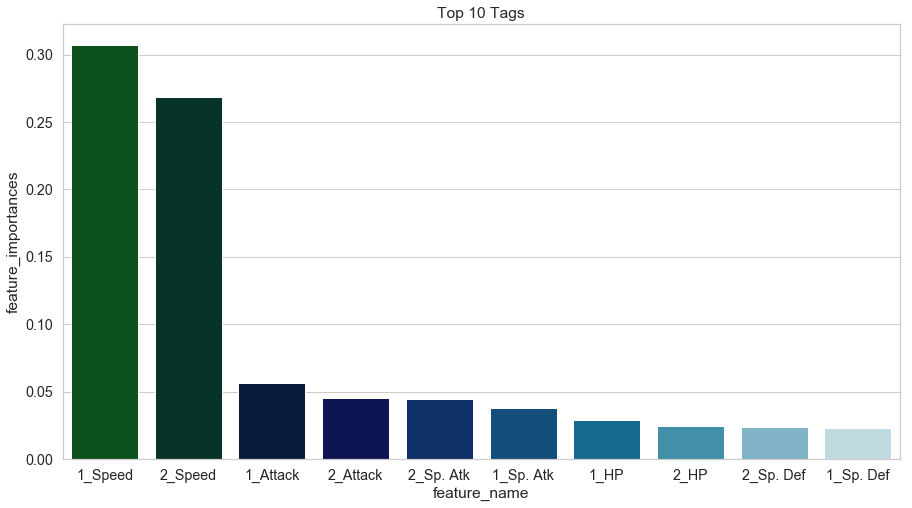

In [76]:
sns.set(style="whitegrid",font_scale=1.3)
f, ax = plt.subplots(figsize=(15, 8))
sns.color_palette("BuGn_r")

sns.barplot(x="feature_name", y="feature_importances", data=df_feature_importance, ax=ax, palette="ocean", )
plt.title("Top 10 Tags")

### Question 3: Ranking - 30 points


Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.

(5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.
Pokémon tournaments can be represented as a so-called dominance graph. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon i has won a strictly larger number of times against Pokémon j than j has won against i (that is, if i dominates j), there is a directed edge pointing from node i to node j. The dominance graph can be represented as an adjacency matrix G where entry Gij is 1 if there is an edge pointing from i to j, and 0 otherwise.

---

In [533]:
# from task 2

df_combats = pd.read_csv('combats.csv')
df_poke = pd.read_csv('pokemon.csv')
df_combats["win"] = df_combats.apply(lambda x: 0 if x.Winner == x.Second_pokemon else 1, axis=1)
df_combats.head(2)

,First_pokemon,Second_pokemon,Winner,win
0,266,298,298,0
1,702,701,701,0


In [541]:
# define winner and loser for each combat

df_combats["Loser"] = df_combats.apply(lambda x: x.Second_pokemon if x.win == 1 else x.First_pokemon , axis=1)
df_combats_new = df_combats.drop(['First_pokemon','Second_pokemon','win'], axis=1)
df_combats_new.head()

,Winner,Loser
0,298,266
1,701,702
2,668,191
3,683,237
4,151,231


In [558]:
# calculate win ratio - new dataframe with index as pokemon id

df_combats_new_ratio = df_combats_new
wins = df_combats_new_ratio['Winner'].value_counts()
loss = df_combats_new_ratio['Loser'].value_counts()

df_new = pd.DataFrame({'wins':wins, 'loss':loss})
df_new['win_ratio'] = df_new.apply(lambda row: row.wins/(row.loss+row.wins), axis=1)
df_new = df_new.sort_values(by='win_ratio', ascending=False)

ranking = df_new.merge(df_poke, right_on='pid', left_on=df_new.index)
ranking.head(10)

,wins,loss,win_ratio,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,127.0,2,0.984496,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
1,116.0,3,0.974790,513,Weavile,Dark,Ice,70,120,65,45,85,125,False
2,121.0,4,0.968000,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
3,115.0,4,0.966387,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
4,136.0,5,0.964539,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
5,124.0,5,0.961240,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
6,122.0,5,0.960630,727,Greninja,Water,Dark,72,95,67,103,71,122,False
7,118.0,5,0.959350,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
8,119.0,6,0.952000,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
9,114.0,6,0.950000,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False


In [ ]:
# they have very high speed in common and low hp

In [292]:
df_poke.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


## NetworkX

In [511]:
# build adjacency matrix using networkx
import networkx as nx

G = nx.from_pandas_edgelist(df_combats_new, 'Winner', 'Loser', edge_attr=None, create_using = nx.Graph())
print(nx.info(adjacency_nx))

nx.set_node_attributes(G, df_poke['Name'].to_dict(), 'Name' )
nx.set_node_attributes(G, df_poke['pid'].to_dict(), 'pid' )
nx.set_node_attributes(G, df_poke['Class 1'].to_dict(), 'Class 1' )

print("sample node: ", G.node[4])

A = nx.to_pandas_adjacency(G)
A = A.astype('int64')
A = A.sort_index(axis=1)
A = A.sort_index(axis=0)
A.head()

Name: 
Type: Graph
Number of nodes: 784
Number of edges: 46226
Average degree: 117.9235
sample node:  {'Name': 'Charmander', 'pid': 5, 'Class 1': 'Fire'}


,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [523]:
#df_combats_new[(df_combats_new["Loser"]==2)&(df_combats_new["Winner"]==5)]

## crosstab

In [524]:
# build adjacency matrix using crosstab

adjacency = pd.crosstab(df_combats_new["Winner"], df_combats_new["Loser"], margins=False)
adjacency.head()

Loser,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
Winner,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [496]:
print("number of edges: ", adjacency.sum().sum())

number of edges:  50000


In [491]:
# set same values to zero (example [3][4]=2 [4][3]=2 -> set to 0)

for i in adjacency.columns:
    for j in adjacency.index:
        if i in adjacency.index:
            if j in adjacency.columns:
                if adjacency.loc[i,j] == adjacency.loc[j,i] & adjacency.loc[i,j] != 0:
                    adjacency.loc[j,i] = 0
                    adjacency.loc[i,j] = 0

In [492]:
print("number of edges: ", adjacency.sum().sum())

number of edges:  49788


In [493]:
# The dominance graph can be represented as an adjacency matrix G where entry Gij is 1 
# if there is an edge pointing from i to j, and 0 otherwise.

dominance_graph = adjacency
dominance_graph[dominance_graph > 0] = 1
dominance_graph.head()

print("number of edges: ", adjacency.sum().sum())

number of edges:  46130


---
(10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix A = G + G2. Consider a given row of A; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.


---


In [555]:
# dominance score represents number of defeated pokemon 

A = dominance_graph + dominance_graph ** 2
dominance_score = A.sum(axis=1)
dominance_score.head()

df_dominance_score = pd.DataFrame({"dominance_score":dominance_score})


(7 points) Compute A and extract the 10 Pokémon with the highest dominance score.

---

In [560]:
ranking_2 = ranking

df_dominance_score = df_dominance_score.sort_values(by='dominance_score', ascending=False)
ranking_2 = df_dominance_score.merge(ranking, right_on='pid', left_on='Winner')
ranking_2.head(10)

,dominance_score,wins,loss,win_ratio,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,276,152.0,12,0.926829,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
1,250,136.0,5,0.964539,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
2,250,133.0,12,0.917241,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
3,248,134.0,19,0.875817,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True
4,242,130.0,28,0.822785,214,Murkrow,Dark,Flying,60,85,42,85,42,91,False
5,240,130.0,9,0.935252,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False
6,240,128.0,7,0.948148,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False
7,238,127.0,2,0.984496,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
8,236,127.0,7,0.947761,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True
9,236,125.0,10,0.925926,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True



(3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?

---

Linear correlation between the two scores.

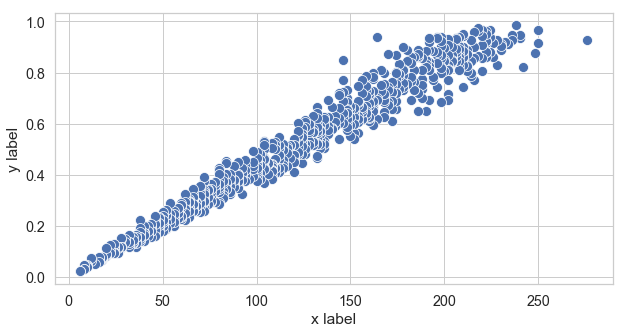

In [641]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=ranking_2, x='dominance_score', y='win_ratio', ax=ax, s=100)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
plt.show()

In [660]:
from scipy import stats
from sklearn import preprocessing

def normalize_df(df):
    df.astype(float).values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    df_normalized = pd.DataFrame(x_scaled)
    df_normalized.columns = df.columns
    return df_normalized

x,y = 'dominance_score', 'win_ratio'
df_to_normalize = ranking_2[[x,y]]

df_normalized = normalize_df(df_to_normalize)
df_normalized.head()

,dominance_score,win_ratio
0,1.000000,0.940102
1,0.903704,0.979271
2,0.903704,0.930144
3,0.896296,0.887117
4,0.874074,0.832033


K-S Test:  0.1545338441890166 	 	 P-value:  1.193829735765537e-08


/Users/josefweber/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


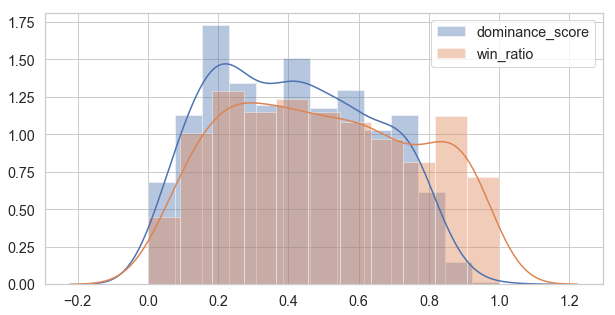

In [661]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df_normalized[[x]], label=x)
sns.distplot(df_normalized[[y]], label=y)
ax.legend()

#res, p_value = stats.ks_2samp(df_normalized.dominance_score, df_normalized.win_ratio)
res, p_value = stats.ks_2samp(df_normalized[x], df_normalized[y])
print("K-S Test: ",res, "\t \t P-value: ", p_value)

 top 10 changed all altough the values speed and attack have the same importance 
 more legendary and mega pokemons in dominance

1. normalizing the data 
2. applied This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.
3. very low p-value indicates the chance of being a "lucky" test result.
    4. The smaller the p-value is the smaller the chance that our result was luck
    

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

- H0: Distributions are the same: high p-value
- HA: Distributions are different: low p-value


our p-value = 0.00000000119 -> Distributions are different


(5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.

---

In [ ]:
#